# YouTube Simulation (in notebook form)

### Initializing environment packages and variables 📚

In [2]:
# Importing libraries/packages
import random
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# Importing class files
from agent import Agent
from video import Video
from activity import Activity
from behavior_reference import BEHAVIOR_ARCHETYPE_PARAMETERS
from behavior_reference import AGENT_ARCHETYPE_DISTRIBUTION

In [3]:
# Defining our macro values to be referenced later on
NUM_VIDEOS = 10000;
NUM_AGENTS = 100;

### Creation of Video Objects 🎥

In [4]:

# Generate random view count (views range from 1 to 1 million)
random_view_counts = []
for i in range(NUM_VIDEOS):
    r = random.randint(1, 1000000)
    random_view_counts.append(r)


# Generate random (unique) video ids
# resultant random numbers list
random_video_ids = []
extremeness_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# traversing the loop 1000 times
for i in range(NUM_VIDEOS):

    # r=random.randint(1,100000)
    # # checking whether the generated random number is not in the
    # # randomList
    # if r not in random_video_ids:
    #     # appending the random number to the resultant list, if the condition is true
        random_video_ids.append(i)


# Generate random video length
random_vid_lengths = []
for i in range(NUM_VIDEOS):
    r = random.randint(1, 80)
    random_vid_lengths.append(r)

# Generate random video extremeness
random_extremeness = []
for i in range(NUM_VIDEOS):
    r = random.choice(extremeness_values)
    random_extremeness.append(r)


# Generate random number of thumbs up
random_thumbs_up = []
for i in range(NUM_VIDEOS):
    r = random.randint(0, 50000)
    random_thumbs_up.append(r)


# Use the above arrays to create video objects
all_videos = []
for i in range(NUM_VIDEOS):   # create videos


    # Grab the data points for the video
    views = random_view_counts[i];
    vid_id = random_video_ids[i];
    length = random_vid_lengths[i];
    extremeness = random_extremeness[i];
    thumbs_up = random_thumbs_up[i];

    # Create the video object
    random_vid = Video(views, vid_id, length, extremeness, thumbs_up);

    # Add the video object to our array of videos
    all_videos.append(random_vid);

In the cell below, we can test that the video objects are created properly.

In [5]:
# Let's make sure this worked.

print("Information for the first three videos:");
for i in range(3):
    print("Views: " + str(all_videos[i].views));
    print("Video ID: " + str(all_videos[i].vid_id));
    # print("Length: " + str(all_videos[i].length) +  " minutes");
    print("Extremeness: " + str(all_videos[i].extremeness));
    # print("Thumbs up count: " + str(all_videos[i].thumbs_up));
    print("");

# # Let's test the watch function
for i in range(10):
    Activity.watch(all_videos[i])

Information for the first three videos:
Views: 107886
Video ID: 0
Extremeness: 0.1

Views: 560652
Video ID: 1
Extremeness: 0.2

Views: 395789
Video ID: 2
Extremeness: 0.9



### Creating our Agents 👩‍🔬

In [6]:
# Now that we've generated the videos, we can generate our agents.
# Let's start with 100 agents.


# TODO: so far the simulation works with only 100 agents. You have to scale up the archetype distribution to somehow keep
# those ratios for any number of agents.


# This means we will have the following archetype counts:
"""
AGENT_ARCHETYPE_DISTRIBUTION = {
    "progressive_activist": .08,
    "traditional_liberal": .11,
    "passive_liberal": .15,
    "politically_disengaged": .26,
    "moderate": .15,
    "traditional_conservative": .19,
    "devoted_conservative": .06
}    


# todo: multiply above in actual exectuion by number of agents
"""
# So, 8 progressive activists, 11 traditional liberals, 15 passive liberals, 26 politically disengaged,
# 15 moderates, 19 traditional conservatives, and 6 devoted conservatives.
# Since we have 100 agents, their IDs can just be 1-100 in the order they are created.


AGENT_ARCHETYPE_DISTRIBUTION = {
    "progressive_activist": 0.08,
    "traditional_liberal": 0.11,
    "passive_liberal": 0.15,
    "politically_disengaged": 0.26,
    "moderate": 0.15,
    "traditional_conservative": .19,
    "devoted_conservative": 0.06
}

# Creating an array to hold our agents
our_agents = [];

id_counter = 0;
# Generate the progressive activists (8)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["progressive_activist"] * NUM_AGENTS)):    
    our_agent = Agent(False, "progressive_activist", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the traditional liberals (11)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["traditional_liberal"] * NUM_AGENTS)):
    our_agent = Agent(False, "traditional_liberal", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the passive liberals (15)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["passive_liberal"] * NUM_AGENTS)):
    our_agent = Agent(False, "passive_liberal", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the politically disengaged (26)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["politically_disengaged"] * NUM_AGENTS)):
    our_agent = Agent(False, "politically_disengaged", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the moderates (15)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["moderate"] * NUM_AGENTS)):
    our_agent = Agent(False, "moderate", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the traditional conservatives (19)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["traditional_conservative"] * NUM_AGENTS)):
    our_agent = Agent(False, "traditional_conservative", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the devoted conservatives (6)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["devoted_conservative"] * NUM_AGENTS)):
    our_agent = Agent(False, "devoted_conservative", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

Once again, we can grab some data to test that these agents were created successfully.

In [7]:
for i in range(6,10):   # just a frew random agents versus showing the whole list
    print("Agent ID: " + str(our_agents[i].agent_id) + "\tArchetype: " + our_agents[i].archetype);

Agent ID: 6	Archetype: progressive_activist
Agent ID: 7	Archetype: progressive_activist
Agent ID: 8	Archetype: traditional_liberal
Agent ID: 9	Archetype: traditional_liberal


### Simulating a Day 📅

So, what does an agent do in a given day?

* Click on a video (they will be provided with a random video at start of day)
    * Decide to watch the video if it aligns with their archetype parameters 
        * (todo: figure out how to code that. Probably just a bunch of checks for each archetype.)
    * Actually watch the video
    * Increment the video views
    * Add the video length to their total time spent watching for today
    * Flip a coin to determine if a thumbs up is left
    * If total time spent watching for today is under their archetype's daily limit, find a new video.
        * If over time, stop watching and end the day.


#### Defining Functions

In [8]:
# Function to click on a video (agent will be provided with a random video at start of day)
def suggest_video(video_list, num_videos):
    random_video_id = random.randrange(num_videos);
    return video_list[random_video_id];
    

# Function to print the attributes of a video object
def display_vid_attrs(our_video):
    rand_vid_views = our_video.views
    rand_vid_id = our_video.vid_id
    rand_vid_length = our_video.length
    rand_vid_extremeness = our_video.extremeness
    rand_vid_thumbsup = our_video.thumbs_up

    print("Video ID: " + str(rand_vid_id))
    print("View Count: " + str(rand_vid_views))
    print("Length: " + str(rand_vid_length) + " minutes")
    print("Extremeness: " + str(rand_vid_extremeness))
    print("Thumbs Up Count: " + str(rand_vid_thumbsup))


# Function to display an agent's ID and archetype
def display_agent(our_agent):
    print("Agent ID: " + str(our_agent.agent_id));
    print("Archetype: " + our_agent.archetype)


# I copied this from https://www.geeksforgeeks.org/python-reversing-list/#
def Reverse(lst):
   new_lst = lst[::-1]
   return new_lst

In [9]:
# Test the video clicking
suggested_video = suggest_video(all_videos, NUM_VIDEOS)
display_vid_attrs(suggested_video)   

length_total_temp = 0
for i in range(NUM_VIDEOS):
    l = all_videos[i].length
    length_total_temp = length_total_temp + l

length_total_temp = length_total_temp / NUM_VIDEOS

print(length_total_temp)

Video ID: 5955
View Count: 109800
Length: 74 minutes
Extremeness: 0.9
Thumbs Up Count: 4449
40.2843


#### The Daily Simulation Code

The below code is where all of the watching actually happens for each agent.
As of now, it only runs for one day, but making more days is as simple as just putting everything inside a  ```for i in range(NUM_DAYS)``` loop.

In [10]:
total_minutes_watched_today = 0   # how many minutes the agent has watched today
total_vids_watched_today = 0  # how many videos the agent watched today
agent_minutes_watched_today_array = []
agent_vids_watched_today_array = []
agent_extremeness_array = []

'''
   Change the ERROR below to DEBUG to trigger all of the print statements. 
   They're there mostly as tests from when I was debugging and such.
   However, if you want to see "real-time" info from the simulation as it's running, feel free to uncomment them.
'''
logger = logging.getLogger()
logger.setLevel(logging.ERROR)


for i in range(NUM_AGENTS): # runs through the simulation for every agent in our array of agents
    
    # print("AGENT #" + str(i))
    # Establishing the values we need from our agent before any videos are watched
    daily_agent = our_agents[i]
    daily_agent_archetype = daily_agent.archetype

    # These two need to be declared OUTSIDE of the run for each video.
    # So, declare them within the day for a given agent, but OUTSIDE of the actual video selection checking loop.
    # Otherwise, they don't actually get updated each time.
    agent_minutes_watched_today = 0   # how many minutes the agent has watched today
    agent_vids_watched_today = 0  # how many videos the agent watched today


    activity_log = []  # ids of the videos the agent watched today


    # Get the values for our agent's archetype

    daily_agent_longest_vid = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["longest_vid_threshold"]
    daily_agent_yt_threshold = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["yt_time_threshold"]
    daily_agent_pol_aff = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["political_affiliation"]
    daily_agent_vid_extr = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["video_extremity"]
    daily_agent_pop_thresh = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["popularity_threshold"]


    time_left_check = True; # means we have enough time for the agent to keep watching videos


    # This is where the agent is actually watching videos.
    while(time_left_check == True):

        suggested_video = suggest_video(all_videos, NUM_VIDEOS)

        # display_agent(daily_agent)
        # # print("")
        # display_vid_attrs(suggested_video)


        # Compare our agent's thresholds to the attributes of the video

        # print("")

        # Check minimum view threshold
        if(suggested_video.views >= daily_agent_pop_thresh):
            popularity_check = True
            logging.debug("Video is popular enough.")
        else:
            popularity_check = False
            logging.debug("Video is not popular enough.")

        # Check agent's max viewing length
        if(suggested_video.length < daily_agent_longest_vid):
            length_check = True
            logging.debug("Video is proper length.")
        else:
            length_check = False
            logging.debug("Video is too long.")

        # Check if watching this video would exceed the agent's daily threshold
        potential_mins_watched = agent_minutes_watched_today + suggested_video.length
        if(potential_mins_watched < daily_agent_yt_threshold):
            time_left_check = True
            logging.debug("Still time to watch this video.")
        else:
            time_left_check = False
            logging.debug("Not enough time left to watch this video.")

        # Check if this video is too extreme for the agent.


    
        # Left-leaning archetypes will watch anything at 0.5 and above. Right-leaning will watch 0.5 and below.
        if(daily_agent_pol_aff == "left"):
            # Will not watch anything under 0.5 extremeness
            # If video extremeness is < 0.5 or higher than their extremeness value, do not watch.
            if((suggested_video.extremeness < 0.5) or (suggested_video.extremeness > daily_agent_vid_extr)):
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True
                logging.debug("Video is within extremeness bounds (between 0.5 and agent's archetype value).")
        elif(daily_agent_pol_aff == "right"):
            # Will not watch anything above 0.5 extremeness
            # If video extremeness is > 0.5 or lower than their extremeness value (0.0 is extreme here), do not watch.
            if((suggested_video.extremeness > 0.5) or (suggested_video.extremeness < daily_agent_vid_extr)):
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True
                logging.debug("Video is within extremeness bounds (between agent's archetype value and 0.5).")
        elif(daily_agent_pol_aff == "middle"):
            # print("Extremeness:" + str(suggested_video.extremeness))
            #todo: figure out what goes here
            # figuring this archetype is like middle of the road, they'll watch between 0.4 and 0.6
            if((suggested_video.extremeness < 0.2) or (suggested_video.extremeness > 0.8)):
                
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True 


        # If all four checks pass, congrats! The agent will watch the video.
        if(popularity_check and length_check and time_left_check and extreme_check):
            Activity.watch(suggested_video)     # Agent actually watches the video.
            agent_minutes_watched_today = agent_minutes_watched_today + suggested_video.length
            agent_vids_watched_today = agent_vids_watched_today + 1
            # print("\nTotal minutes watched today is now " + str(agent_minutes_watched_today) + ".")
    
    # From below here, the agent is done watching videos for the day

    total_minutes_watched_today = total_minutes_watched_today + agent_minutes_watched_today
    total_vids_watched_today = total_vids_watched_today + agent_vids_watched_today

    agent_minutes_watched_today_array.append(agent_minutes_watched_today)
    agent_vids_watched_today_array.append(agent_vids_watched_today)
    
    
    # This array needs to get the extremeness threshold of each agent
    agent_extremeness_array.append(daily_agent_vid_extr)

    logging.debug("\nVideos watched today: " + str(agent_vids_watched_today))
    logging.debug("Minutes watched today: " + str(agent_minutes_watched_today))



print("TOTAL minutes watched today: " + str(total_minutes_watched_today))
print("TOTAL # of videos watched today: " + str(total_vids_watched_today))

# TODO for next time:
# OH! Maybe do a while loop where while(time_left_check < daily_agent_yt_threshold), the whole getting a video and all the other checks thing happens.
# Before this can be executed with other agents, however, you need to figure out extremeness for the middle ground agents.
# Maybe if the extremeness is within 0.2 of the agent's value, the video can be watched. Idk.

# Also, when you hopefully eventually get this whole thing working, use the Jupyter format to add lots of background and descriptive text.

# Also also, use some of the graphing packages to make cute graphs of all the data across a given day.
# Like maybe a big histogram of how many minutes each agent watched, or average watched/other stats by archetype


# for i in range(NUM_AGENTS):
#     print(agent_extremeness_array[i])




TOTAL minutes watched today: 2811
TOTAL # of videos watched today: 101
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.0
0.0
0.0
0.0
0.0
0.0


### Graphing Our Outputs

What are some interesting data points we can (eventually) collect from the overall simulation?

* How many total minutes + videos watched (already done)
* Avg. minutes + videos watched per agent (also already done)
* Avg. extremity of all videos that are watched
* Different averages grouped by archetype
* etc....

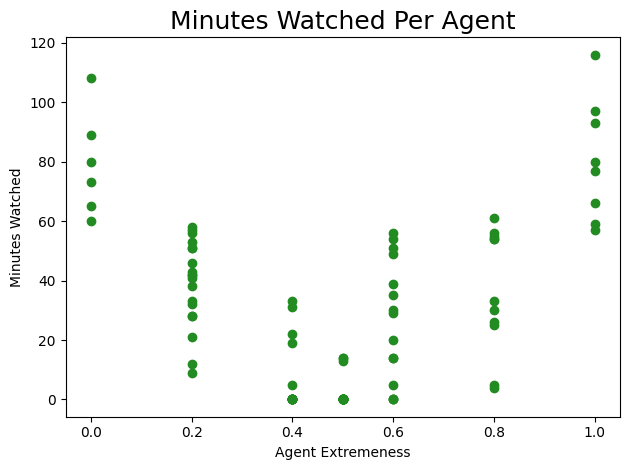

KeyboardInterrupt: 

In [11]:
# Let's graph each agent's extremeness with how much they watched per day.

import matplotlib as matplotlib

# Reversing the arrays so extremenesses are in ascending order
x = Reverse(agent_extremeness_array)
y = Reverse(agent_minutes_watched_today_array)

plt.scatter(x,y,color = 'forestgreen') # A bar chart
plt.title('Minutes Watched Per Agent', fontsize = 18)
plt.xlabel('Agent Extremeness')
plt.ylabel('Minutes Watched')

# defining display layout
plt.tight_layout()

# fig = matplotlib.pyplot.gcf()
plt.figure(figsize=(10,6))
# fig.savefig('test2png.png', dpi=100)

plt.text(50, numpy.nanmean(y) + 10, "Average: " + str(numpy.nanmean(y)), size=10, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='cornflowerblue',   # edge color: rbg values
                   fc='lightsteelblue',   # fill color: rbg values
                   )
         )

plt.show()  # WHY IS THIS GRAPH SO TINY

# todo: minutes watched (y) versus agent extremity score (x axis). probably better as a scatter plot

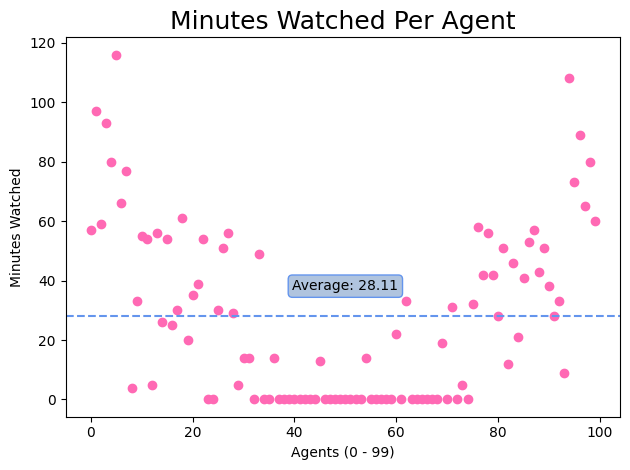

In [12]:
# Let's graph each agent with how much they watched per day.
# x axis = agents (0-199), y axis = minutes watched per agent

x = numpy.arange(0,NUM_AGENTS)
y = agent_minutes_watched_today_array

plt.scatter(x,y, color = 'hotpink') # A bar chart
plt.title('Minutes Watched Per Agent', fontsize = 18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.ylabel('Minutes Watched')
plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'cornflowerblue')

# defining display layout
plt.tight_layout()

plt.text(50, numpy.nanmean(y) + 10, "Average: " + str(numpy.nanmean(y)), size=10, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='cornflowerblue',   # edge color: rbg values
                   fc='lightsteelblue',   # fill color: rbg values
                   )
         )

plt.show()

# todo: minutes watched (y) versus agent extremity score (x axis). probably better as a scatter plot



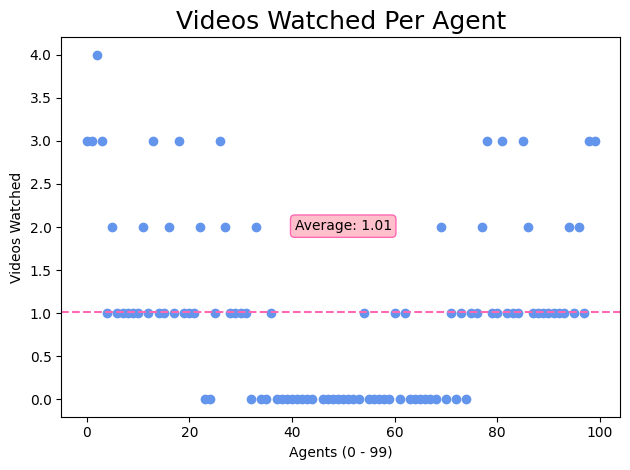

In [13]:
# Let's graph each agent with how many videos they watched per day.
# x axis = agents (0-99), y axis = videos watched per agent

x = numpy.arange(0,NUM_AGENTS)
y = agent_vids_watched_today_array

plt.scatter(x,y, color = 'cornflowerblue') # A bar chart
plt.title('Videos Watched Per Agent', fontsize = 18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.ylabel('Videos Watched')
plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'hotpink')

# defining display layout
plt.tight_layout()

plt.text(50, numpy.nanmean(y) + 1, "Average: " + str(numpy.nanmean(y)), size=10, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='hotpink',   # edge color: rbg values
                   fc='pink',   # fill color: rbg values
                   )
         )

plt.show()

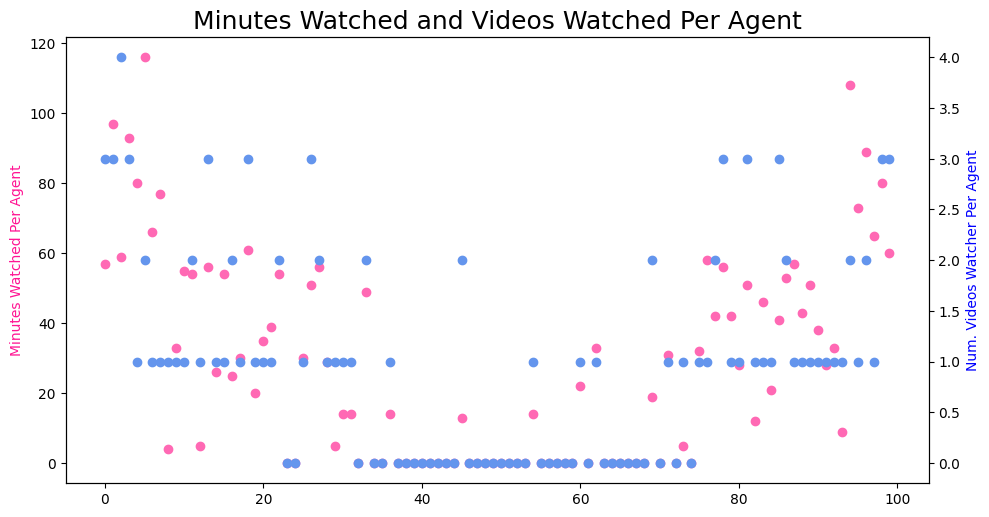

In [14]:
# Let's graph the above two side by side as a scatter plot.

y1 = agent_minutes_watched_today_array
y2 = agent_vids_watched_today_array

fig, ax = plt.subplots(figsize = (10, 5))

# using the twinx() for creating
# another axes object for secondary y-Axis
ax2 = ax.twinx()
# creating a bar plot
ax.scatter(x, y1, color = 'hotpink')
ax2.scatter(x, y2, color = 'cornflowerblue')

# giving labels to the axises
# ax.set_xlabel('x-axis', color = 'r')
ax.set_ylabel('Minutes Watched Per Agent', color = 'deeppink')

# secondary y-axis label
ax2.set_ylabel('Num. Videos Watcher Per Agent', color = 'b')
 
# defining display layout
plt.tight_layout()

# plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_minutes_watched_today_array, color = 'hotpink')
# plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_vids_watched_today_array, color = 'cornflowerblue') # use second y axis

plt.title('Minutes Watched and Videos Watched Per Agent', fontsize=18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.show()

Well, that looks confusing! Let's do the same thing, but with bars. That way, we can see the viewing habits for each agent more clearly.

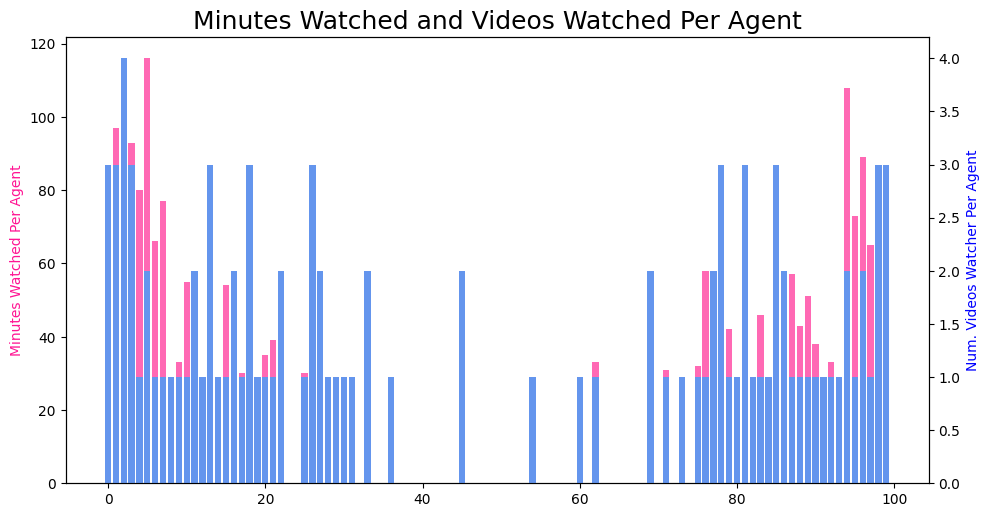

In [15]:
# Let's graph the above two side by side as a bar plot.

y1 = agent_minutes_watched_today_array
y2 = agent_vids_watched_today_array

fig, ax = plt.subplots(figsize = (10, 5))

# using the twinx() for creating
# another axes object for secondary y-Axis
ax2 = ax.twinx()
# creating a bar plot
ax.bar(x, y1, color = 'hotpink')
ax2.bar(x, y2, color = 'cornflowerblue')

# giving labels to the axises
# ax.set_xlabel('x-axis', color = 'r')
ax.set_ylabel('Minutes Watched Per Agent', color = 'deeppink')

# secondary y-axis label
ax2.set_ylabel('Num. Videos Watcher Per Agent', color = 'b')
 
# defining display layout
plt.tight_layout()

# plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_minutes_watched_today_array, color = 'hotpink')
# plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_vids_watched_today_array, color = 'cornflowerblue') # use second y axis

plt.title('Minutes Watched and Videos Watched Per Agent', fontsize=18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.show()

### Todo List 📝

* ✅Get things to work with a different number of agents.
* ✅? Figure out why some agents aren't watching any videos at all. Are they really going through the whole list? Out of 10,000 videos, does not a single one really work for the middle ground people? Probably not.
    * NOTE from 7/31: I'm still not sure what the issue is. It's not extremeness (I don't think), it's not the amount of views, and the issue is the same even when scaling up the number of videos. Thus, there's a chance it's something with how the videos are being generated, and whether a) every agent is seeing every video (which they probably aren't), or b) it's something with the agent's "pickiness" in terms of selecting a video
    * NOTE from 8/1: okay what the HECK did I change. I changed something somewhere (I think it was the thresholds in the behavior_reference doc), but now for some reason just about every agent is watching a video. Literally what. I guess I won't complain because it's "working" now, but I have no clue if that was what fixed it. 
    * I THINK ITS MAKING EVERYONE A PROGRESSIVE ACTIVIST!!!! WHAT!!!!!!!!!!
    * okay I got it
* Actually get the recommendation function working (that's kind of the whole point of this). There's probably a lot you can graph from that---like little maps, almost, of what videos map to which (and their extremeness, etc.).
    * On that note, actually figure out what links two videos. Is it within a certain extremeness value? Or what?
* ✅Think about research questions you're aiming to answer---how are you going to examine and tell that story? 
    * e.g. do more extreme agents get channeled to more extreme videos? what graph would show that?
    * Does the recommendation system make users watch more extreme videos than what they would watch without the system? Can we compare side-by-side the video extremeness for agents with and without the system?
    * If the recommendation system does, in fact, channel viewers towards more extreme content, in what ways can we mitigate or reduce these effects?
    * Do extreme videos continually beget more extreme videos? i.e. is there a "rabbit hole" effect where an agent's watched videos become more and more extreme? Can we use a graph to make a map of which videos (and their extremeness) recommend each other?

* ✅Look at package -- ```logging``` (can automate print statements and such) 